In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv("data/df_eda2_cat.csv")

In [3]:
df.head()

,state,goal_usd_log,name_len,delta_dead_laun,AU,BE,CA,CH,DE,DK,...,"""slug"":""technology/wearables""","""slug"":""technology/web""","""slug"":""theater""","""slug"":""theater/comedy""","""slug"":""theater/experimental""","""slug"":""theater/festivals""","""slug"":""theater/immersive""","""slug"":""theater/musical""","""slug"":""theater/plays""","""slug"":""theater/spaces"""
0,successful,6.907755,23,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,successful,9.615805,51,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,failed,9.479141,34,1439.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,successful,7.937375,40,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,successful,8.160518,31,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# replace state values with 0s and 1s
df['state'].replace(to_replace={'successful': 1, 'failed': 0}, inplace=True)

In [5]:
df.head()

,state,goal_usd_log,name_len,delta_dead_laun,AU,BE,CA,CH,DE,DK,...,"""slug"":""technology/wearables""","""slug"":""technology/web""","""slug"":""theater""","""slug"":""theater/comedy""","""slug"":""theater/experimental""","""slug"":""theater/festivals""","""slug"":""theater/immersive""","""slug"":""theater/musical""","""slug"":""theater/plays""","""slug"":""theater/spaces"""
0,1,6.907755,23,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,9.615805,51,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,9.479141,34,1439.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,7.937375,40,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,8.160518,31,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# define features and target
X = df.drop('state', axis=1)
y = df['state']

In [7]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [8]:
def train(X_train, y_train, X_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

In [9]:
def evaluate(y_true, y_pred):
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    sns.heatmap(cm, annot=True)

In [10]:
# train DecistionTree
tree = DecisionTreeClassifier()
y_pred_tree = train(X_train, y_train, X_test, tree)

              precision    recall  f1-score   support

           0       0.69      0.66      0.67     22082
           1       0.79      0.81      0.80     34262

    accuracy                           0.75     56344
   macro avg       0.74      0.73      0.74     56344
weighted avg       0.75      0.75      0.75     56344



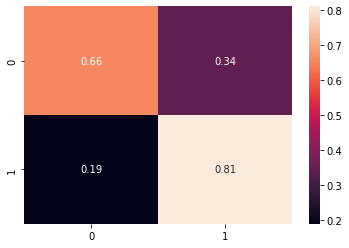

In [11]:
# evaluate tree
evaluate(y_test, y_pred_tree)

In [14]:
# train svm
svm = SVC(max_iter=1000)
y_pred_svm = train(X_train, y_train, X_test, svm)

/Users/laurenthartmann/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.55      0.23      0.32     22082
           1       0.64      0.88      0.74     34262

    accuracy                           0.62     56344
   macro avg       0.59      0.55      0.53     56344
weighted avg       0.60      0.62      0.58     56344



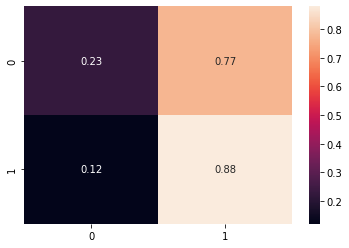

In [15]:
# evaluate svm
evaluate(y_test, y_pred_svm)

In [17]:
# train random forest
forest = RandomForestClassifier(max_depth=10)
y_pred_forest = train(X_train, y_train, X_test, forest)

              precision    recall  f1-score   support

           0       0.82      0.30      0.44     22082
           1       0.68      0.96      0.80     34262

    accuracy                           0.70     56344
   macro avg       0.75      0.63      0.62     56344
weighted avg       0.74      0.70      0.66     56344



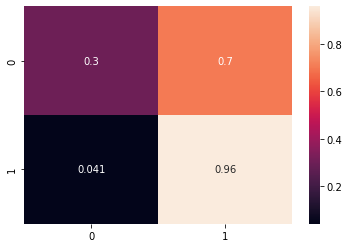

In [19]:
# evaluate random forest
evaluate(y_test, y_pred_forest)